In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable


In [32]:
df=pd.read_csv("C:\PGPDS\ML Projects\Bank Marketing Campaign Efficiency\Bank_Marketing_Campaign_Efficiency prediction.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Feature description :

Bank client data:

1 - age (numeric0)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day: last contact day of the week (categorical: 1:31)

11 - duration: last contact duration, in seconds (numeric). 

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

In [33]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Exploring the Basics 
## Summary: ***
Mean Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)

The mean balance is 1,528. However, the Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.

Note: There are not that much insights we can gain from the descriptive dataset since most of our descriptive data is located not in the "numeric" columns but in the "categorical columns".

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


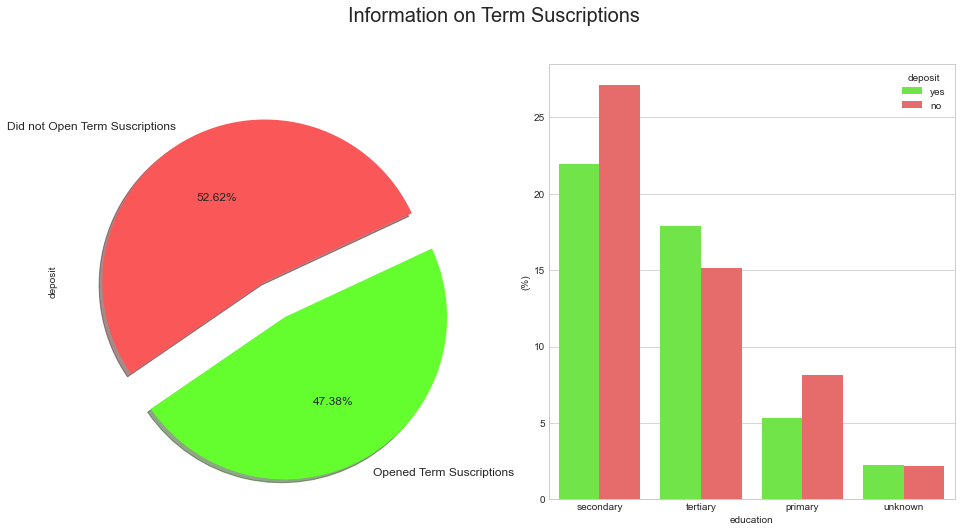

In [35]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
#ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="deposit", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

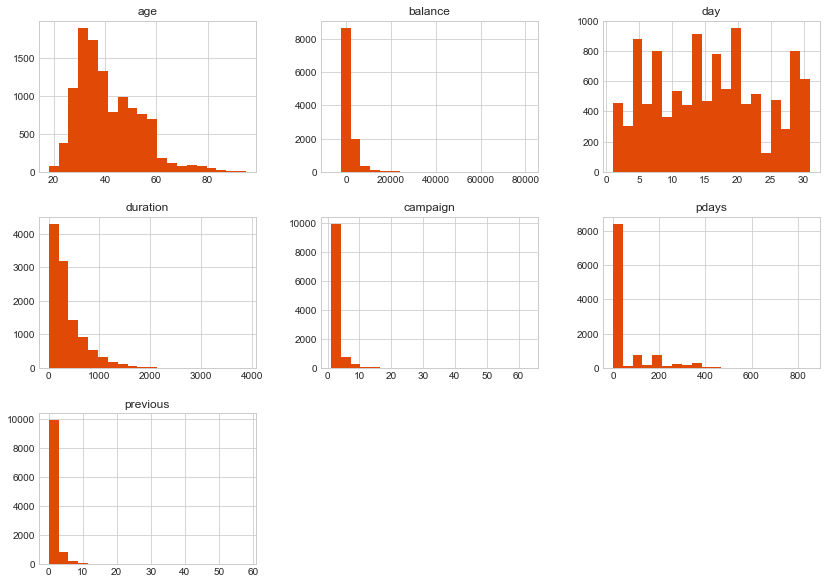

In [36]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [37]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

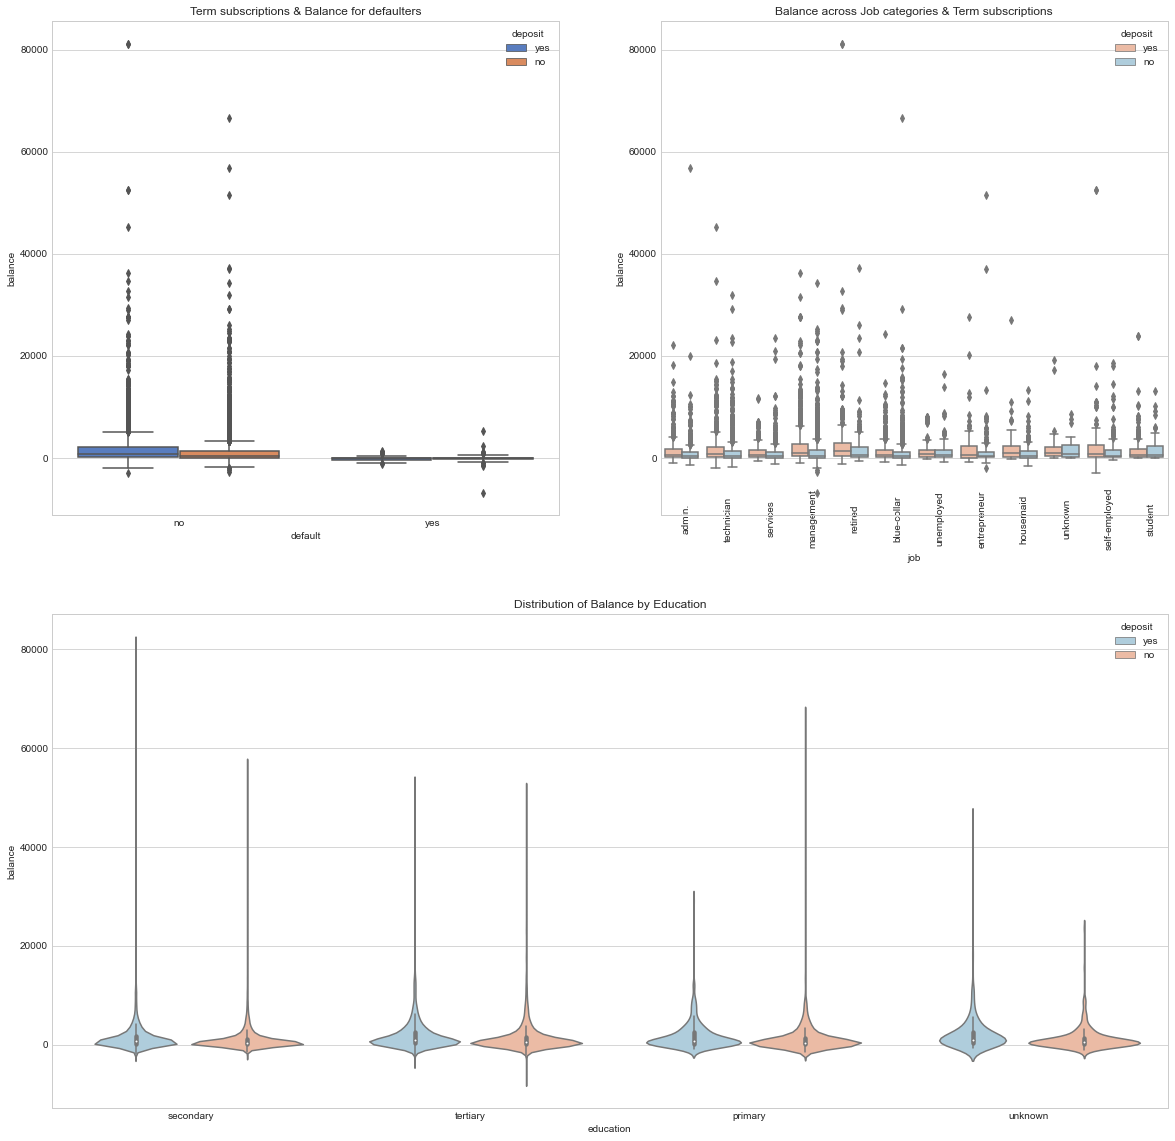

In [38]:
# plt.style.use('dark_background')
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="deposit",
                    data=df, palette="muted", ax=ax1)

g.set_title("Term subscriptions & Balance for defaulters")

# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="deposit",
                 data=df, palette="RdBu", ax=ax2)

g1.set_xticklabels(df["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Balance across Job categories & Term subscriptions")

g2 = sns.violinplot(data=df, x="education", y="balance", hue="deposit", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")


plt.show()

<AxesSubplot:xlabel='job', ylabel='count'>

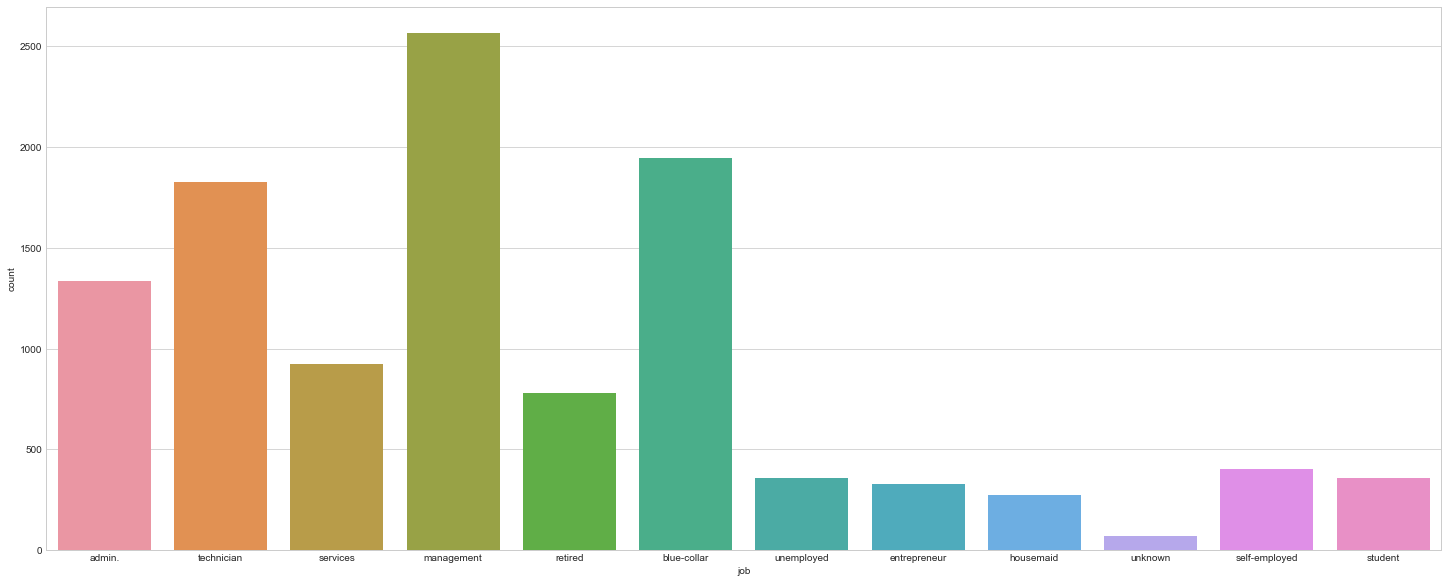

In [39]:
fig = plt.figure(figsize=(25,10))
df['job'].value_counts()
sns.countplot(x=df['job'],data=df)

In [40]:
df.groupby(['job'])['age'].median().sort_values(ascending=False)

job
retired          64.0
housemaid        48.0
unknown          46.5
entrepreneur     41.5
unemployed       40.0
blue-collar      39.0
management       38.0
admin.           37.0
self-employed    37.0
services         37.0
technician       37.0
student          25.0
Name: age, dtype: float64

<AxesSubplot:xlabel='job', ylabel='balance'>

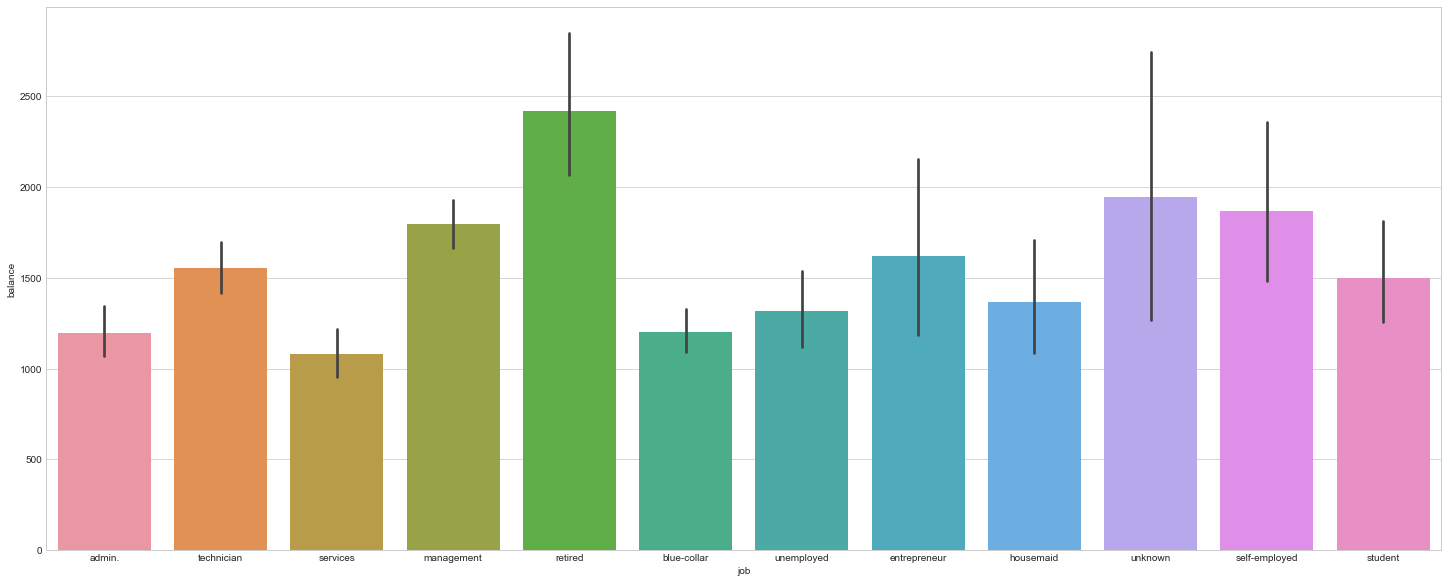

In [41]:
fig = plt.figure(figsize=(25,10))
sns.barplot(x=df['job'],y=df['balance'],data=df)

Analysis by Occupation: 

Defaulters : Those who have not defaulted on a loan seems have less balance over all

Number of Occupations: Management is the occupation that is more prevalent in this dataset.

Age by Occupation: As expected, the retired are the ones who have the highest median age while student are the lowest.

Balance by Occupation: Management and Retirees are the ones who have the highest balance in their accounts.


In [42]:
# Drop the Job Occupations that are "Unknown"
df = df.drop(df.loc[df["job"] == "unknown"].index)

# Admin and management are basically the same let's put it under the same categorical value
lst = [df]

for col in lst:
    col.loc[col["job"] == "admin.", "job"] = "management"
df['job'].value_counts()

management       3900
blue-collar      1944
technician       1823
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: job, dtype: int64

<AxesSubplot:xlabel='marital', ylabel='balance'>

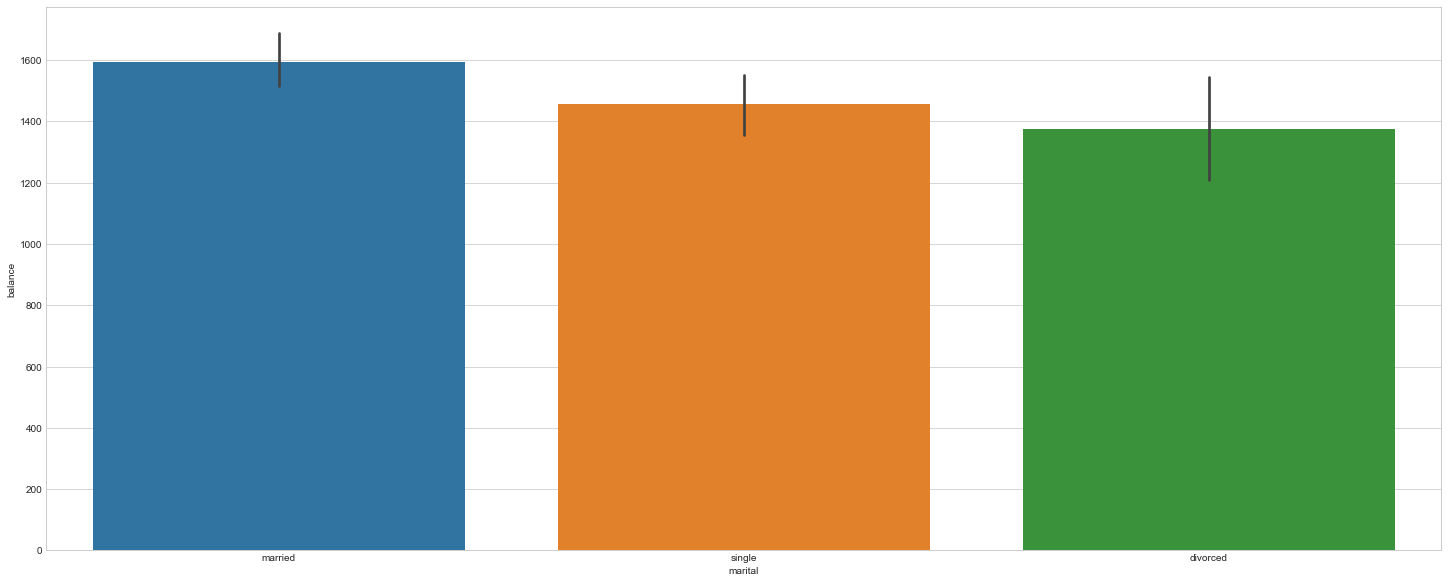

In [43]:
fig = plt.figure(figsize=(25,10))
sns.barplot(x=df['marital'],y=df['balance'],data=df)

Divorced have the least balance which is probable as they had to split assets during the process of divorce

In [44]:
df['marital'].value_counts()

married     6302
single      3499
divorced    1291
Name: marital, dtype: int64

<AxesSubplot:xlabel='marital', ylabel='count'>

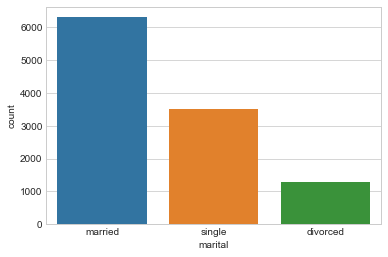

In [45]:
sns.countplot(x='marital',data=df)

<AxesSubplot:xlabel='education', ylabel='balance'>

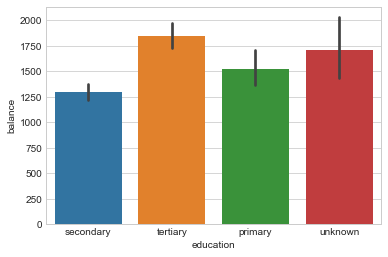

In [46]:
sns.barplot(x='education',y='balance',data=df)

In [47]:
df['balance'].max()
df[df['balance']==df['balance'].max()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3043,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
3380,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes


In [48]:
df = df.drop(df.loc[df["education"] == "unknown"].index)
df['education'].unique()

array(['secondary', 'tertiary', 'primary'], dtype=object)

In [49]:
df['marital/education'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['marital'] == 'single') & (df['education'] == 'primary'), 'marital/education'] = 'single/primary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'primary'), 'marital/education'] = 'married/primary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'
    
    
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,marital/education
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,married/secondary
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,married/secondary
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,married/secondary
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,married/secondary
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,married/tertiary


LinAlgError: 1-th leading minor of the array is not positive definite

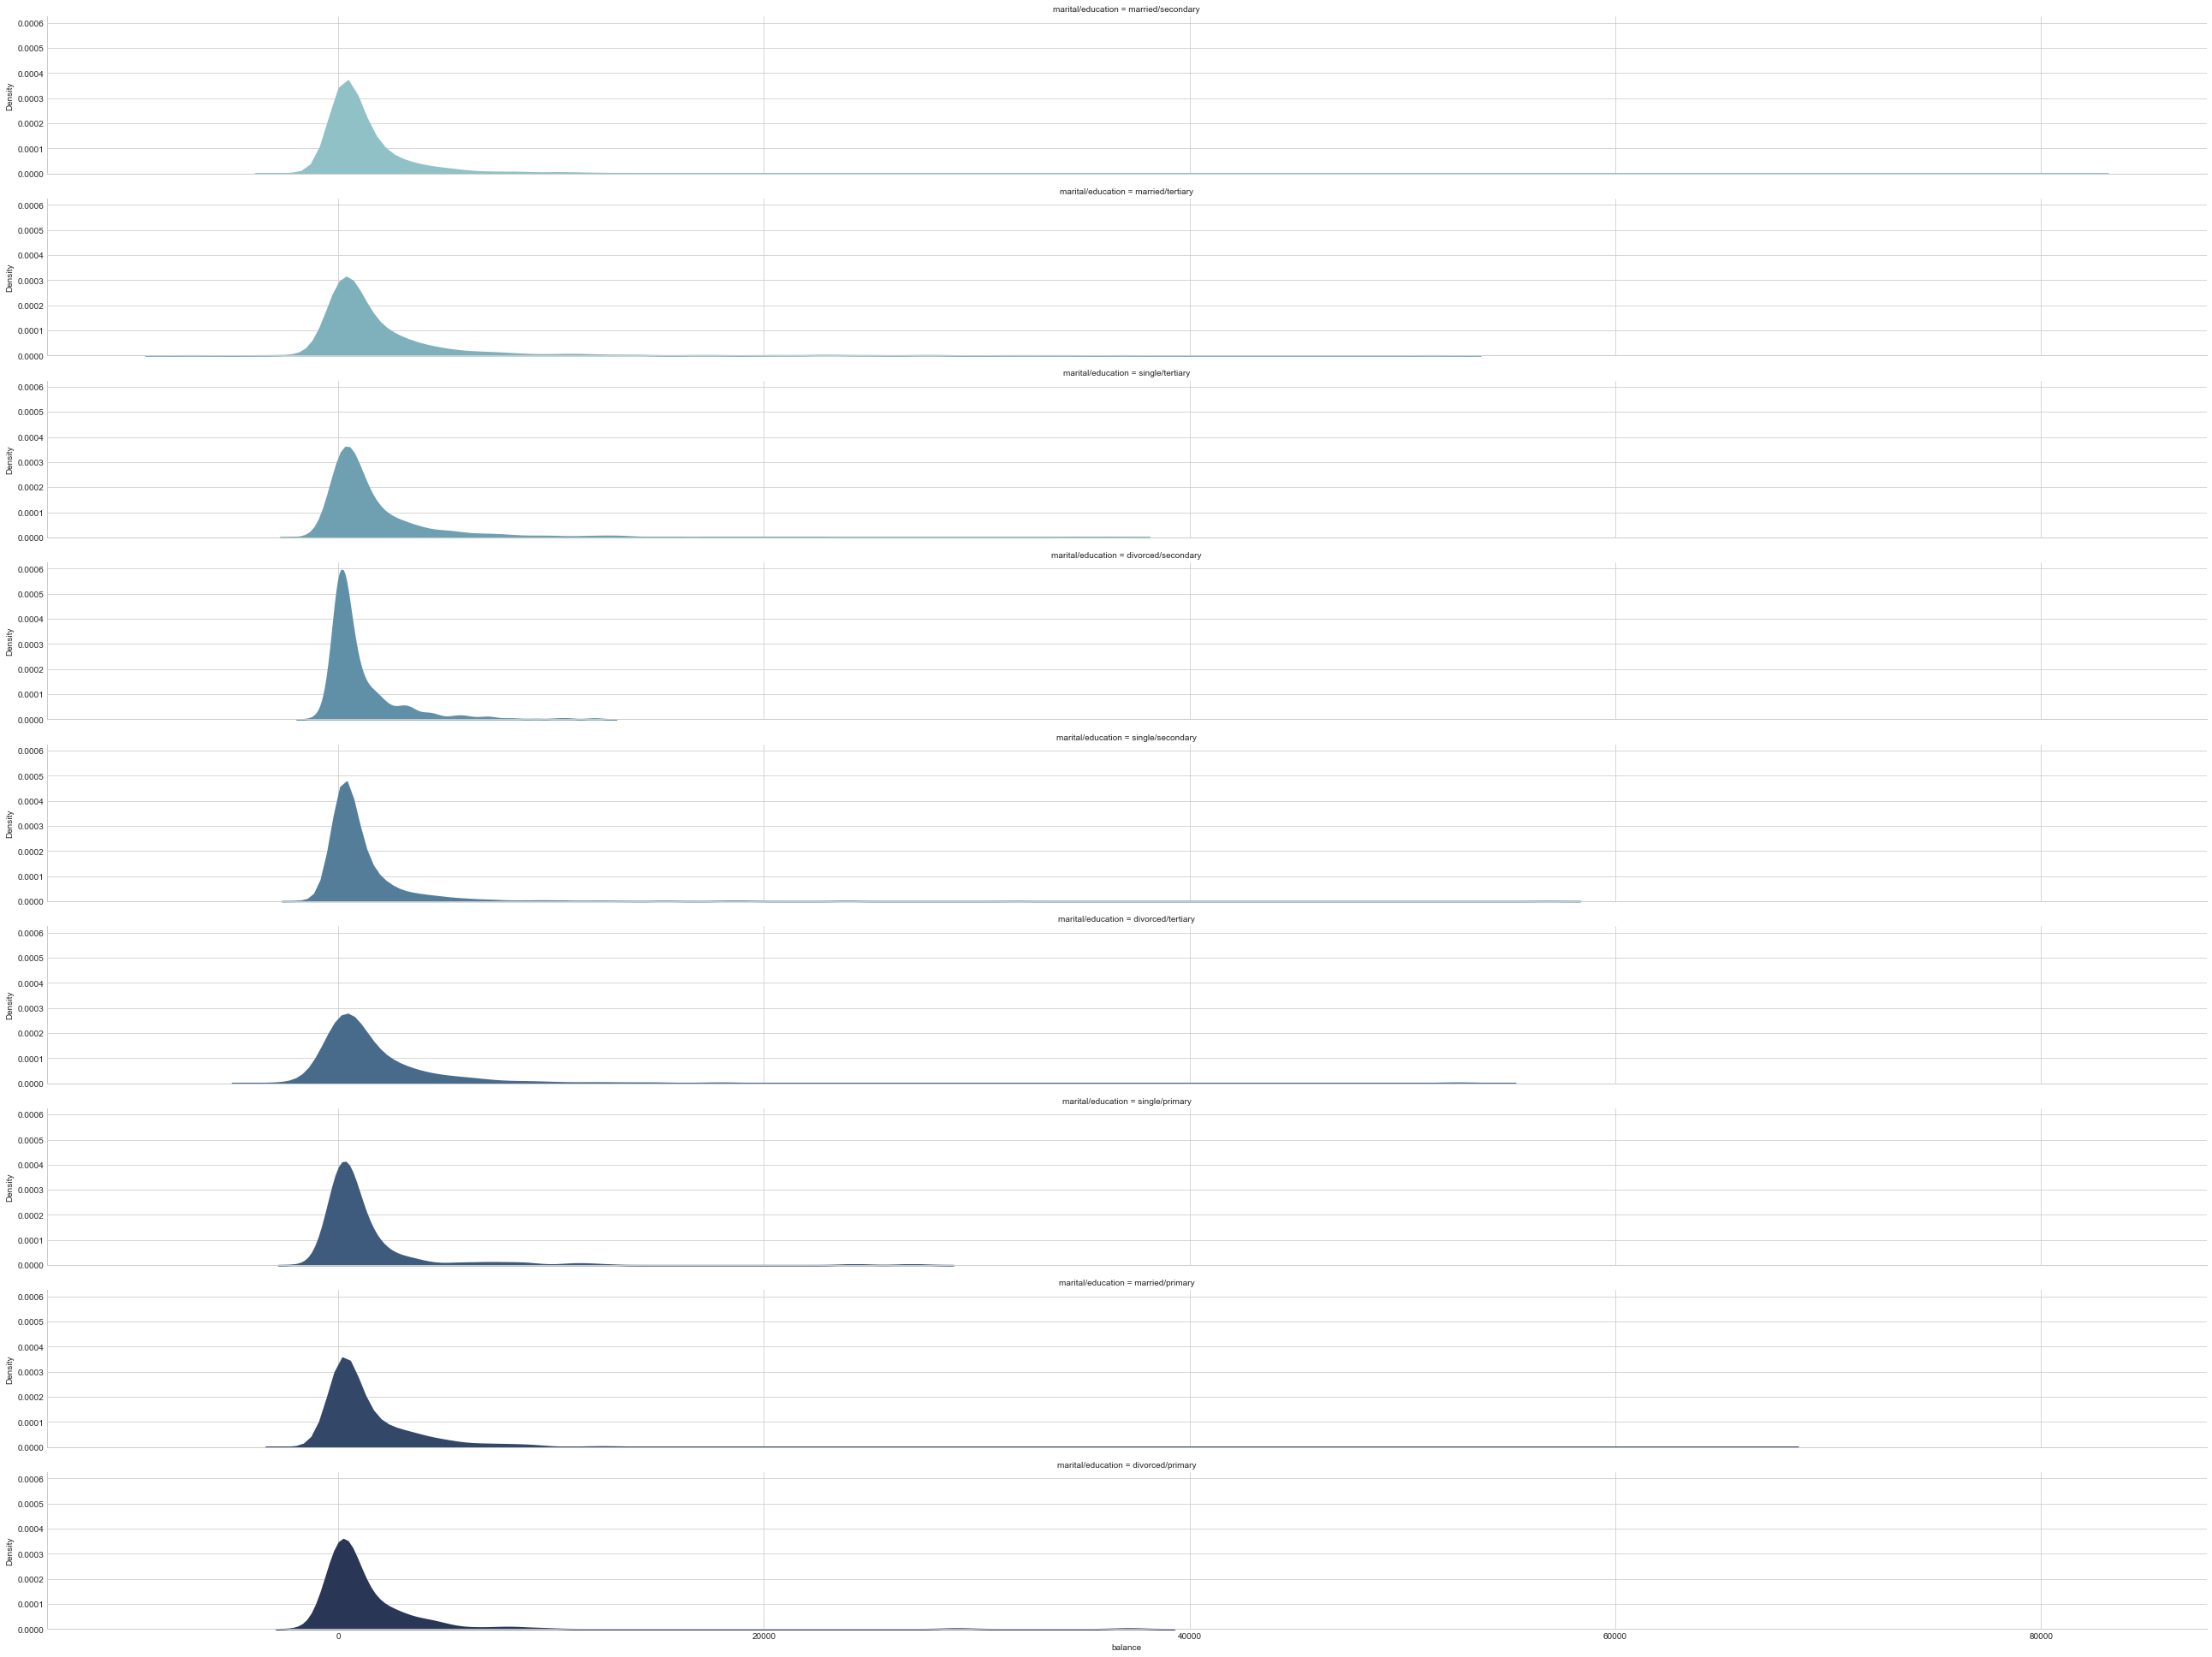

In [50]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="marital/education", hue="marital/education", aspect=12, palette=pal)

g.map(sns.kdeplot, "balance", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "balance", clip_on=False, color="w", lw=1, bw=0)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

Text(0.5, 1.0, 'Median Balance by Educational/Marital Group')

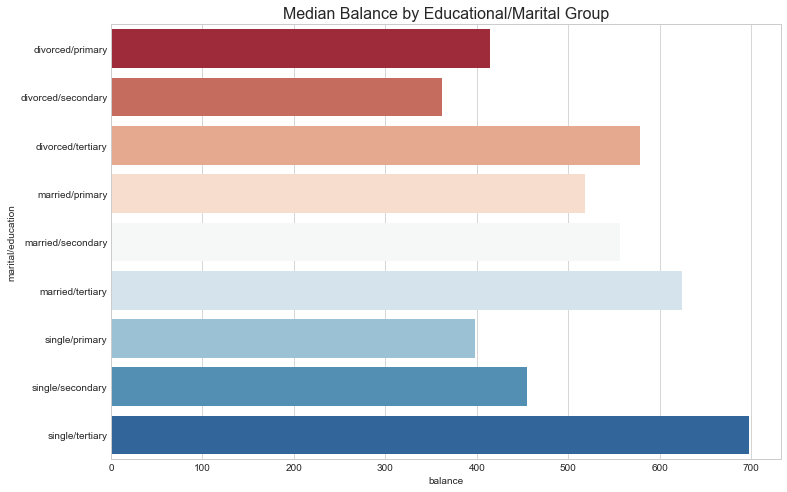

In [52]:
education_groups = df.groupby(['marital/education'], as_index=False)['balance'].median()

fig = plt.figure(figsize=(12,8))

sns.barplot(x="balance", y="marital/education", data=education_groups,
            label="Total", palette="RdBu")

plt.title('Median Balance by Educational/Marital Group', fontsize=16)

In [53]:
fig = plt.figure(figsize=(12,8))
df.groupby(['marital/education'])['loan'].value_counts()

marital/education   loan
divorced/primary    no       181
                    yes       23
divorced/secondary  no       525
                    yes      127
divorced/tertiary   no       338
                    yes       48
married/primary     no       934
                    yes      158
married/secondary   no      2596
                    yes      515
married/tertiary    no      1620
                    yes      218
single/primary      no       175
                    yes       22
single/secondary    no      1474
                    yes      224
single/tertiary     no      1359
                    yes       97
Name: loan, dtype: int64

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='month', ylabel='count'>

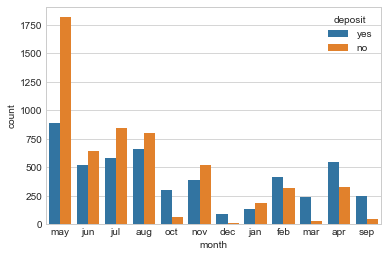

In [54]:
sns.countplot(x='month',hue = df['deposit'],data=df)

<AxesSubplot:xlabel='marital/education', ylabel='count'>

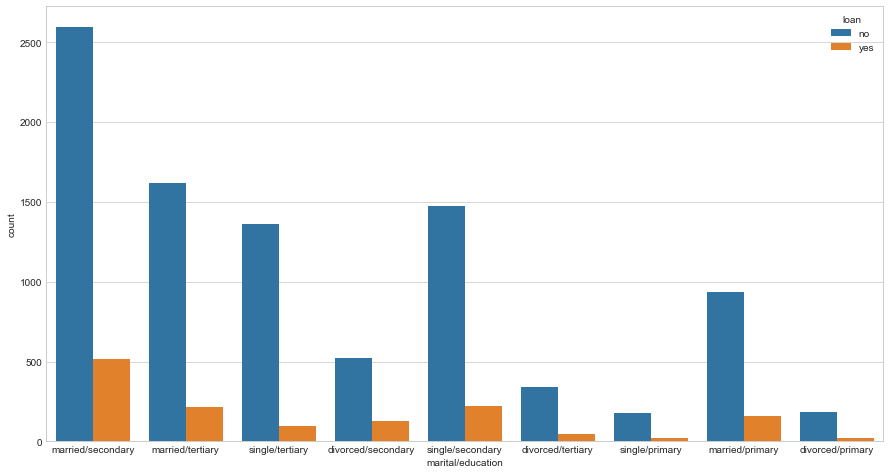

In [55]:
fig = plt.figure(figsize=(15,8))
sns.countplot(x=df['marital/education'],hue=df['loan'])

Married/Secondary group has the highest number of loans which makes sense as a fmaily would have various mortgages

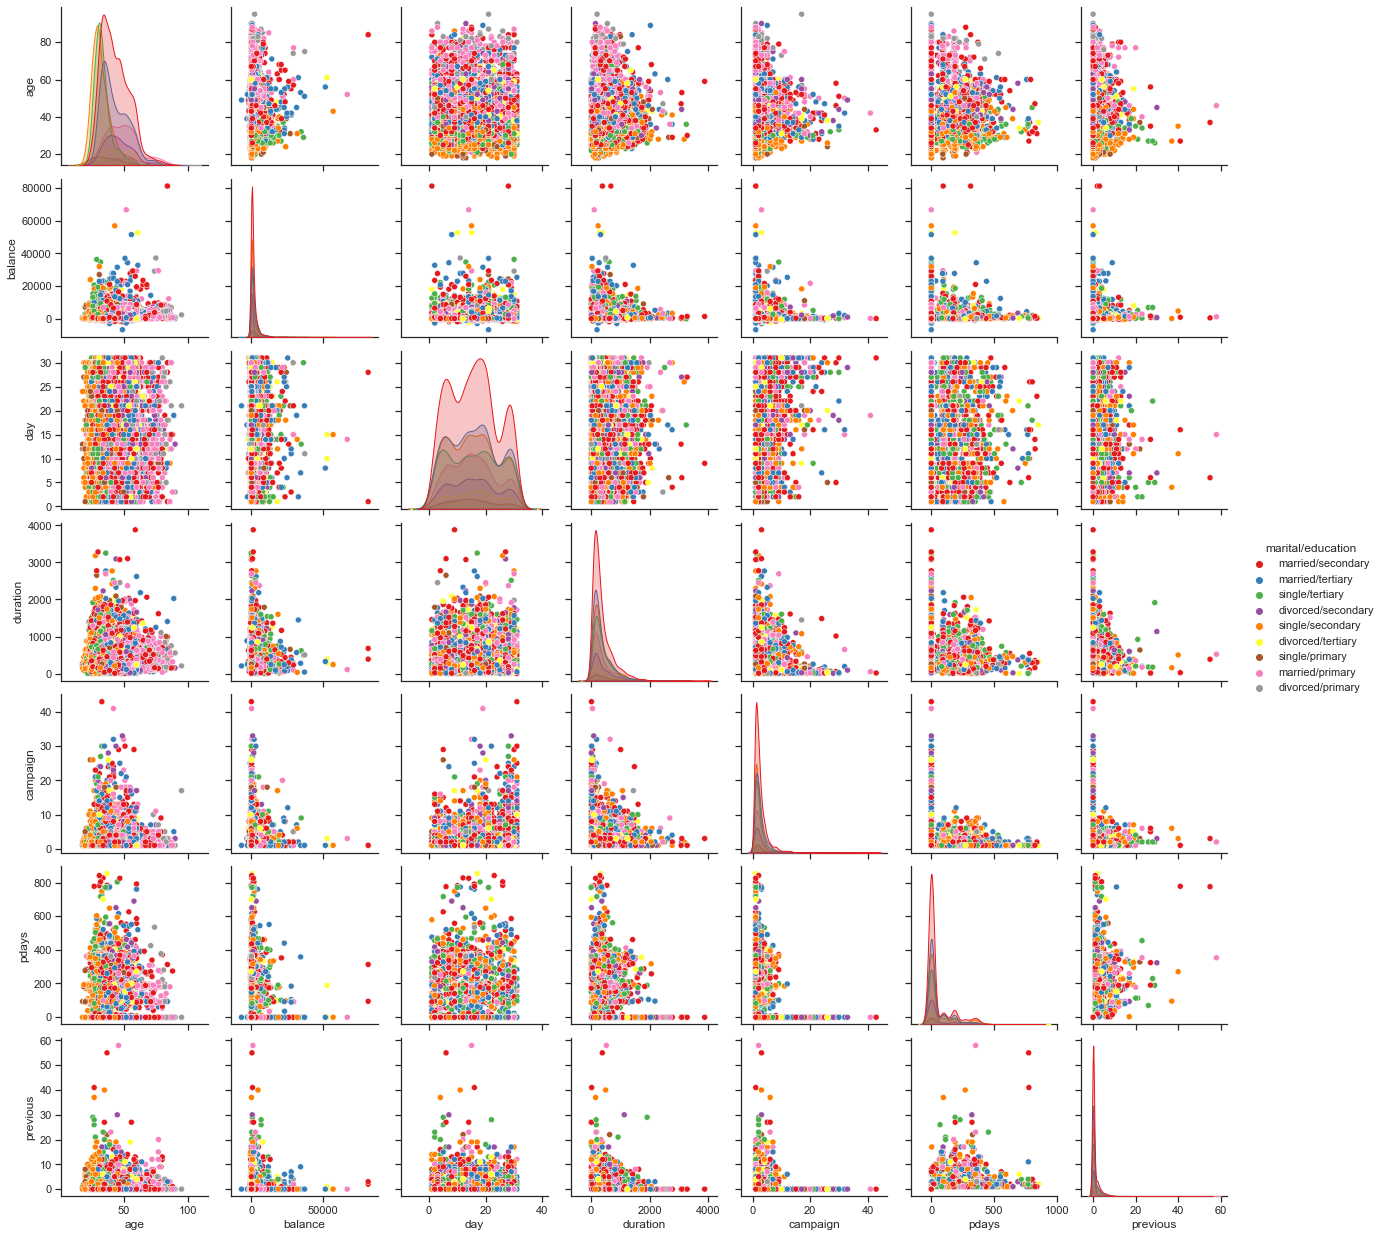

In [56]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df, hue="marital/education", palette="Set1")
plt.show()

In [57]:
df.drop(['marital/education'], axis=1, inplace=True)

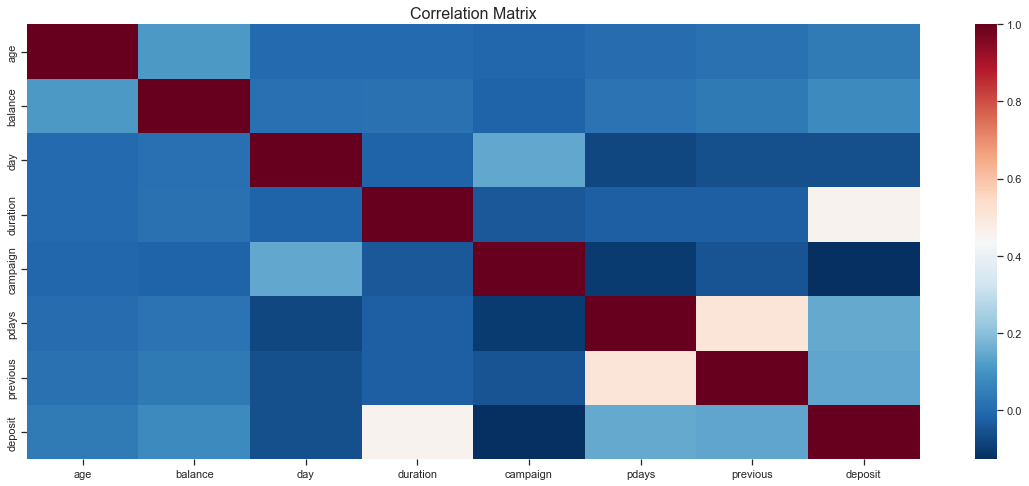

In [58]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(20,8))
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])



# Separate both dataframes into 
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [59]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


## Modelling

In [60]:
#Preprocessing libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


# Machine Learning
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

### Checking Feature Importance

<AxesSubplot:>

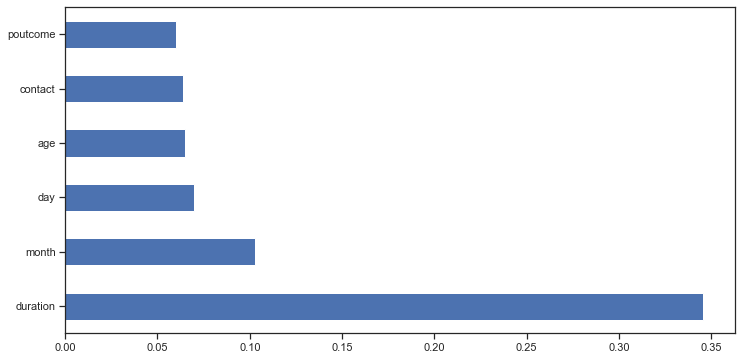

In [61]:
temp_data = df.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
X = temp_data.drop('deposit',axis =1)
y = temp_data['deposit']
model = ExtraTreesRegressor()
model.fit(X,y)


#plot feature importance, some visualization always help
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(6).plot(kind='barh')

### Splitting in Train and Test datasets

In [62]:
X = df.drop('deposit',axis=1)
y= df['deposit']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state = 42)

In [63]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
9522,50,technician,married,secondary,no,103,yes,no,cellular,3,feb,109,4,267,6,failure
790,34,technician,married,tertiary,no,8029,yes,no,cellular,14,aug,593,4,-1,0,unknown
10688,39,blue-collar,married,secondary,no,661,yes,no,cellular,3,feb,84,4,267,4,failure
6382,28,student,single,tertiary,no,221,yes,no,cellular,15,may,176,1,-1,0,unknown
9877,38,technician,single,tertiary,no,5122,yes,no,cellular,20,nov,370,1,184,1,failure


In [64]:
# display categorical variables
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [65]:
# display numerical variables
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [66]:
# Creating Dummies of categorical variables
X_train = pd.concat([X_train[numerical],
                    pd.get_dummies(X_train.job,drop_first=True), 
                     pd.get_dummies(X_train.marital,drop_first=True),
                     pd.get_dummies(X_train.education,drop_first=True),
                     pd.get_dummies(X_train.default,drop_first=True),
                     pd.get_dummies(X_train.housing,drop_first=True),
                     pd.get_dummies(X_train.loan,drop_first=True),
                     pd.get_dummies(X_train.contact,drop_first=True),
                     pd.get_dummies(X_train.month,drop_first=True),
                     pd.get_dummies(X_train.poutcome,drop_first=True)
                     ], axis=1)

X_test = pd.concat([X_test[numerical],
                     pd.get_dummies(X_test.job,drop_first=True), 
                     pd.get_dummies(X_test.marital,drop_first=True),
                     pd.get_dummies(X_test.education,drop_first=True),
                     pd.get_dummies(X_test.default,drop_first=True),
                     pd.get_dummies(X_test.housing,drop_first=True),
                     pd.get_dummies(X_test.loan,drop_first=True),
                     pd.get_dummies(X_test.contact,drop_first=True),
                     pd.get_dummies(X_test.month,drop_first=True),
                     pd.get_dummies(X_test.poutcome,drop_first=True)
                     ], axis=1)

In [67]:
cols = X_train.columns

In [68]:
# Feature scaling
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [69]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

<AxesSubplot:xlabel='None', ylabel='None'>

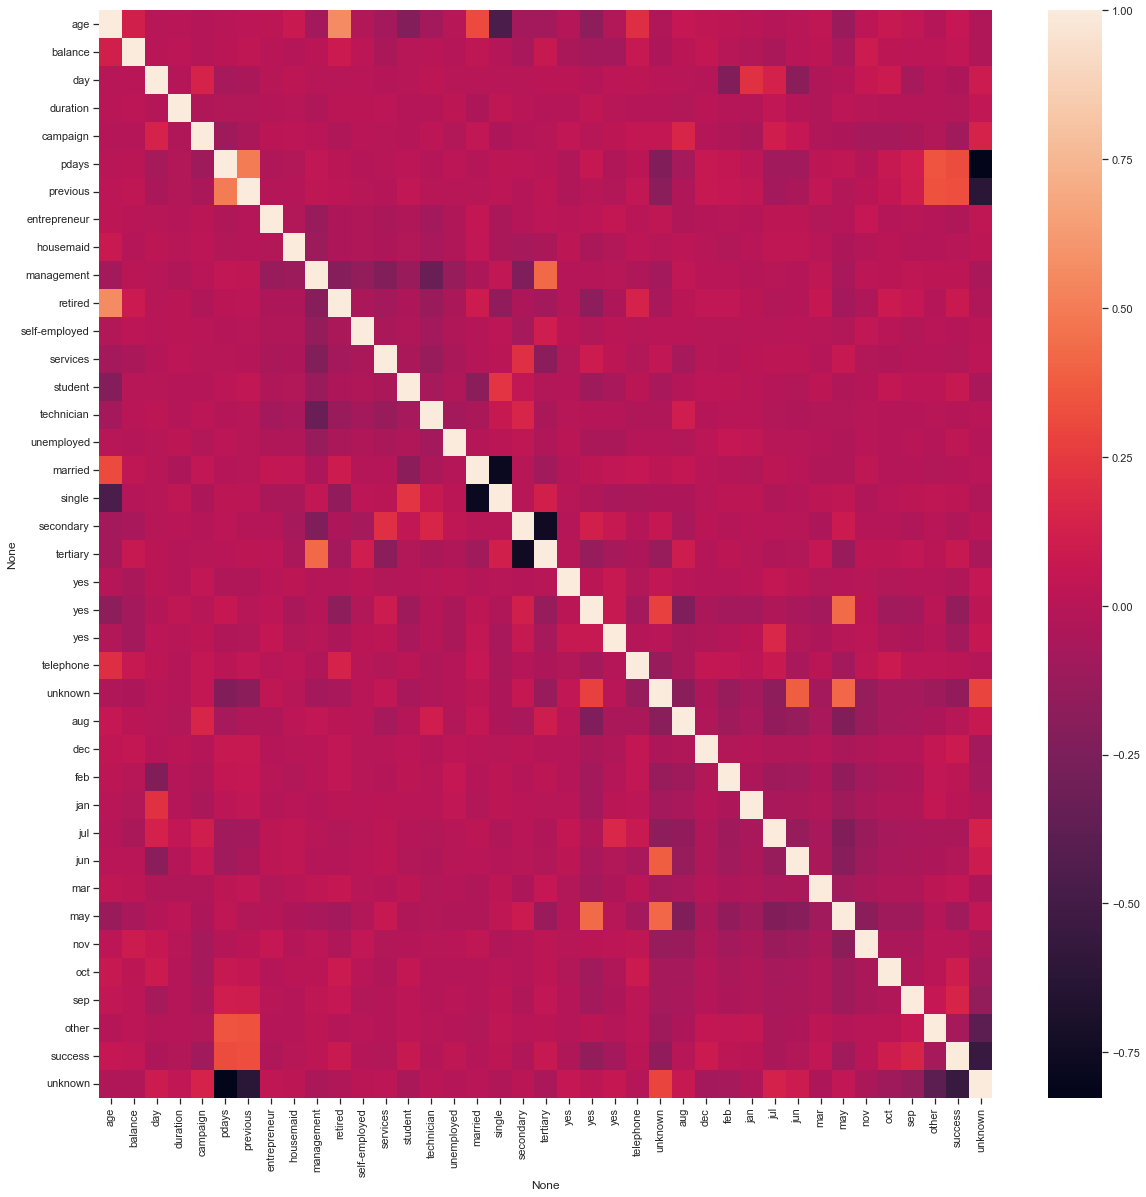

In [70]:
corr = X_train.corr()
figure = plt.figure(figsize=(20,20))
sns.heatmap(corr)

In [71]:
X_train.head()

,age,balance,day,duration,campaign,pdays,previous,entrepreneur,housemaid,management,...,jul,jun,mar,may,nov,oct,sep,other,success,unknown
0,0.415584,0.033545,0.066667,0.027584,0.071429,0.323281,0.103448,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.207792,0.127997,0.433333,0.152359,0.071429,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.272727,0.040195,0.066667,0.021139,0.071429,0.323281,0.068966,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.129870,0.034952,0.466667,0.044857,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.259740,0.093355,0.633333,0.094870,0.000000,0.223160,0.017241,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [72]:
X_train.shape, X_test.shape

((8507, 39), (2127, 39))

In [73]:
%%time
kf = KFold(n_splits=5)
classifiers = []
rs = 42

classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier(random_state = rs))
classifiers.append(GaussianNB())
classifiers.append(RandomForestClassifier())
classifiers.append(LogisticRegression())
classifiers.append(AdaBoostClassifier())
classifiers.append(GradientBoostingClassifier())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kf, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({
    "CrossValMeans":cv_means,
    "CrossValerrors": cv_std,
    "Algorithm":["KNeighbors","DecisionTree","Naive Bayes","Random Forest","Logistic Regression","Adaboost","Gradient Boost"]})
cv_res.sort_values(by = 'CrossValMeans', ascending = False)

CPU times: total: 109 ms
Wall time: 11 s


,CrossValMeans,CrossValerrors,Algorithm
3,0.854356,0.008119,Random Forest
6,0.849538,0.008788,Gradient Boost
5,0.828377,0.008895,Adaboost
4,0.820032,0.006136,Logistic Regression
1,0.786179,0.014381,DecisionTree
0,0.723171,0.006271,KNeighbors
2,0.715063,0.021951,Naive Bayes


### Hyperparameter Tuning of models

Decision Tree

In [74]:
%%time
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': range(1,25),
              'min_samples_split': range(2,15),
              'min_samples_leaf': range(1,10),
              'criterion' :['gini', 'entropy']
             }

tree_clas = DecisionTreeClassifier(random_state=rs)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, n_jobs = -1, verbose=True)
grid_search.fit(X_train, y_train)

dt_best = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 16848 candidates, totalling 84240 fits
{'criterion': 'gini', 'max_depth': 14, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2}
0.7909939615253625
CPU times: total: 1min 19s
Wall time: 3min 13s


KNN

In [75]:
%%time
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range)

knc = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knc, param_grid=param_grid, verbose=True, n_jobs = -1)
grid_search.fit(X_train, y_train)

knc_best = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
{'n_neighbors': 13}
0.7295173019810701
CPU times: total: 1.23 s
Wall time: 22.6 s


Naive Bayes

In [76]:
%%time
# Naive Bayes
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

gnb = GaussianNB()
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, verbose=True,n_jobs=-1)
grid_search.fit(X_train, y_train)

gnb_best = grid_search.best_estimator_
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'var_smoothing': 8.111308307896873e-06}
0.7152963867939712
CPU times: total: 1.84 s
Wall time: 2.97 s


Random Forest

In [77]:
%%time
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)]
param_grid = {
              'n_estimators': n_estimators,
              'criterion': ['gini'],
              'max_depth' : [14],
              'max_features': ['log2'],
              'min_samples_leaf': [8],
              'min_samples_split': [2]
             }

rfc_clas = RandomForestClassifier(random_state=rs)
grid_search = GridSearchCV(estimator=rfc_clas, param_grid=param_grid, verbose=True,n_jobs=-1)
grid_search.fit(X_train, y_train)

rf_best = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'criterion': 'gini', 'max_depth': 14, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 50}
0.8478920604524468
CPU times: total: 422 ms
Wall time: 6.64 s


Logistic Regression

In [78]:
%%time
from sklearn.model_selection import GridSearchCV
# Logistic Regression
param_grid = {
              "solver" : ['newton-cg', 'lbfgs', 'liblinear'],
              "penalty" : ['l2'],
              "C" : [100, 10, 1.0, 0.1, 0.01]
             }

lr = LogisticRegression()
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, verbose=True)
grid_search.fit(X_train, y_train)

lr_best = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.8234401413145374
CPU times: total: 2.89 s
Wall time: 2.97 s


Ada Boost

In [79]:
%%time
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
params = {
    'n_estimators': n_estimators,
    'learning_rate': [0.1,0.3,0.5,0.7,0.9,1],
    'algorithm': ['SAMME', 'SAMME.R']
}

adb_clas = AdaBoostClassifier(random_state=rs)
grid_search = GridSearchCV(estimator=adb_clas, param_grid=params, verbose=True,n_jobs=-1)
grid_search.fit(X_train, y_train)

adb_best = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 200}
0.8331964815056603
CPU times: total: 5 s
Wall time: 1min 17s


Gradient Boost

In [80]:
%%time
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)]
params = {
    'n_estimators': n_estimators,
    'learning_rate': [0.1,0.3,0.5,0.7,0.9,1],
    'max_depth' : [14],
    'max_features': ['log2'],
    'min_samples_leaf': [8],
    'min_samples_split': [2]
}

gbc_clas = GradientBoostingClassifier(random_state=rs)
grid_search = GridSearchCV(estimator=gbc_clas, param_grid=params, verbose=True,n_jobs=-1)
grid_search.fit(X_train, y_train)

gbc_best = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
{'learning_rate': 0.1, 'max_depth': 14, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 140}
0.8610565016362118
CPU times: total: 3.75 s
Wall time: 1min 24s


### Checking Test Accuracies for models

In [81]:
models = pd.DataFrame({
    'Model' : ['Random Forest', 'Decision Tree', 'K Neighbors', 'Logistic Regression', 'Naive Bayes', 'Adaboost', 'GradientBoost'],
    'Score' : [rf_best.score(X_test, y_test), dt_best.score(X_test, y_test), knc_best.score(X_test, y_test), lr_best.score(X_test, y_test), gnb_best.score(X_test, y_test),adb_best.score(X_test, y_test),gbc_best.score(X_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
6,GradientBoost,0.855195
0,Random Forest,0.834039
3,Logistic Regression,0.832628
5,Adaboost,0.831688
1,Decision Tree,0.761636
2,K Neighbors,0.739069
4,Naive Bayes,0.724965


### Classification Reports

Decision Tree

In [82]:
y_pred = dt_best.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1147
           1       0.74      0.75      0.74       980

    accuracy                           0.76      2127
   macro avg       0.76      0.76      0.76      2127
weighted avg       0.76      0.76      0.76      2127



KNN

In [83]:
y_pred = knc_best.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77      1147
           1       0.76      0.63      0.69       980

    accuracy                           0.74      2127
   macro avg       0.74      0.73      0.73      2127
weighted avg       0.74      0.74      0.74      2127



Naive Bayes

In [84]:
y_pred = gnb_best.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.89      0.78      1147
           1       0.80      0.53      0.64       980

    accuracy                           0.72      2127
   macro avg       0.75      0.71      0.71      2127
weighted avg       0.74      0.72      0.71      2127



Logistic Regression

In [85]:
y_pred = lr_best.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1147
           1       0.82      0.82      0.82       980

    accuracy                           0.83      2127
   macro avg       0.83      0.83      0.83      2127
weighted avg       0.83      0.83      0.83      2127



Random Forest

In [86]:
y_pred = rf_best.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1147
           1       0.79      0.87      0.83       980

    accuracy                           0.83      2127
   macro avg       0.83      0.84      0.83      2127
weighted avg       0.84      0.83      0.83      2127



Adaboost Classifier

In [87]:
y_pred = adb_best.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1147
           1       0.82      0.82      0.82       980

    accuracy                           0.83      2127
   macro avg       0.83      0.83      0.83      2127
weighted avg       0.83      0.83      0.83      2127



Gradient Boost Classifier

In [88]:
y_pred = gbc_best.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1147
           1       0.82      0.87      0.85       980

    accuracy                           0.86      2127
   macro avg       0.85      0.86      0.85      2127
weighted avg       0.86      0.86      0.86      2127



In [89]:
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [90]:
y_pred_prob = gbc_best.predict_proba(X_test)

In [91]:
y_pred_prob

array([[0.97803808, 0.02196192],
       [0.09941904, 0.90058096],
       [0.3192909 , 0.6807091 ],
       ...,
       [0.03222311, 0.96777689],
       [0.99869962, 0.00130038],
       [0.77844198, 0.22155802]])

# What Actions should the Bank Consider?
<a id="bank_actions"></a>
<img src="https://media.giphy.com/media/l46Cy1rHbQ92uuLXa/giphy.gif">


## Solutions for the Next Marketing Campaign (Conclusion):
1) **Months of Marketing Activity:** We saw that the the month of highest level of marketing activity was the month of **May**. However, this was the month that potential clients tended to reject term deposits offers (Lowest effective rate: -34.49%). For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of **March, September, October and December.** (December should be under consideration because it was the month with the lowest marketing activity, there might be a reason why december is the lowest.)<br><br>
2) **Seasonality:** Potential clients opted to suscribe term deposits during the seasons of **fall** and **winter**. The next marketing campaign should focus its activity throghout these seasons. <br><br>
3) **Campaign Calls:** A policy should be implemented that states that no more than 3 calls should be applied to the same potential client in order to save time and effort in getting new potential clients. Remember, the more we call the same potential client, the likely he or she will decline to open a term deposit. <br><br>
4) **Age Category:** The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. The youngest category had a 60% chance of suscribing to a term deposit while the eldest category had a 76% chance of suscribing to a term deposit. It will be great if for the next campaign the bank addressed these two categories and therefore, increase the likelihood of more term deposits suscriptions. <br><br>
5) **Occupation:** Not surprisingly, potential clients that were students or retired were the most likely to suscribe to a term deposit. Retired individuals, tend to have more term deposits in order to gain some cash through interest payments. Remember, term deposits are short-term loans in which the individual (in this case the retired person) agrees not to withdraw the cash from the bank until a certain date agreed between the individual and the financial institution. After that time the individual gets its capital back and its interest made on the loan. Retired individuals tend to not spend bigly its cash so they are morelikely to put their cash to work by lending it to the financial institution. Students were the other group that used to suscribe term deposits.<br><br>
6) **House Loans and Balances:** Potential clients in the low balance and no balance category were more likely to have a house loan than people in the average and high balance category. What does it mean to have a house loan? This means that the potential client has financial compromises to pay back its house loan and thus, there is no cash for he or she to suscribe to a term deposit account. However, we see that potential clients in the average and hih balances are less likely to have a house loan and therefore, more likely to open a term deposit. Lastly, the next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of suscribing to a term deposit. <br><br>

7) **Develop a Questionaire during the Calls:** Since duration of the call is the feature that most positively correlates with whether a potential client will open a term deposit or not, by providing an interesting questionaire for potential clients during the calls the conversation length might increase. Of course, this does not assure us that the potential client will suscribe to a term deposit! Nevertheless, we don't loose anything by implementing a strategy that will increase the level of engagement of the potential client leading to an increase probability of suscribing to a term deposit, and therefore an increase in effectiveness for the next marketing campaign the bank will excecute. <br><br>

8) <b>Target individuals with a higher duration (above 375): </b> Target the target group that is above average in duration, there is a highly likelihood that this target group would open a term deposit account. The likelihood that this group would open a term deposit account is at 78% which is pretty high. This would allow that the success rate of the next marketing campaign would be highly successful.<br><br>

By combining all these strategies and simplifying the market audience the next campaign should address, it is likely that the next marketing campaign of the bank will be more effective than the current one.




